# Dementia Project

Linear Regression
Logistic Regression
SVM
Neural Networks

In [1]:
# Run this code cell using Shift + Enter before moving further
import numpy as np
import pandas as pd

from sklearn import datasets, linear_model, preprocessing
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from sklearn import svm
import numpy.random as r

import matplotlib.pyplot as plt
%matplotlib inline 

# Loading the data set.

In [2]:
# After completing the code in this code cell, run this code cell before moving further.

df = pd.read_csv('oasis_cross-sectional.csv', na_values='?') 
print(df.shape)
print(df)

(436, 12)
                ID M/F Hand  Age  Educ  SES  MMSE  CDR  eTIV   nWBV    ASF  \
0    OAS1_0001_MR1   F    R   74   2.0  3.0  29.0  0.0  1344  0.743  1.306   
1    OAS1_0002_MR1   F    R   55   4.0  1.0  29.0  0.0  1147  0.810  1.531   
2    OAS1_0003_MR1   F    R   73   4.0  3.0  27.0  0.5  1454  0.708  1.207   
3    OAS1_0004_MR1   M    R   28   NaN  NaN   NaN  NaN  1588  0.803  1.105   
4    OAS1_0005_MR1   M    R   18   NaN  NaN   NaN  NaN  1737  0.848  1.010   
..             ...  ..  ...  ...   ...  ...   ...  ...   ...    ...    ...   
431  OAS1_0285_MR2   M    R   20   NaN  NaN   NaN  NaN  1469  0.847  1.195   
432  OAS1_0353_MR2   M    R   22   NaN  NaN   NaN  NaN  1684  0.790  1.042   
433  OAS1_0368_MR2   M    R   22   NaN  NaN   NaN  NaN  1580  0.856  1.111   
434  OAS1_0379_MR2   F    R   20   NaN  NaN   NaN  NaN  1262  0.861  1.390   
435  OAS1_0395_MR2   F    R   26   NaN  NaN   NaN  NaN  1283  0.834  1.368   

     Delay  
0      NaN  
1      NaN  
2      NaN  
3

In [3]:
# ID M/F Hand  Age  Educ  SES  MMSE  CDR  eTIV   nWBV    ASF

df1= df[['M/F', 'Age', 'eTIV', 'nWBV', 'ASF', 'CDR']]
print(df1)

df2= df1.dropna()
print(df2)

    M/F  Age  eTIV   nWBV    ASF  CDR
0     F   74  1344  0.743  1.306  0.0
1     F   55  1147  0.810  1.531  0.0
2     F   73  1454  0.708  1.207  0.5
3     M   28  1588  0.803  1.105  NaN
4     M   18  1737  0.848  1.010  NaN
..   ..  ...   ...    ...    ...  ...
431   M   20  1469  0.847  1.195  NaN
432   M   22  1684  0.790  1.042  NaN
433   M   22  1580  0.856  1.111  NaN
434   F   20  1262  0.861  1.390  NaN
435   F   26  1283  0.834  1.368  NaN

[436 rows x 6 columns]
    M/F  Age  eTIV   nWBV    ASF  CDR
0     F   74  1344  0.743  1.306  0.0
1     F   55  1147  0.810  1.531  0.0
2     F   73  1454  0.708  1.207  0.5
8     M   74  1636  0.689  1.073  0.0
9     F   52  1321  0.827  1.329  0.0
..   ..  ...   ...    ...    ...  ...
411   F   70  1295  0.748  1.355  0.5
412   F   73  1536  0.730  1.142  0.5
413   F   61  1354  0.825  1.297  0.0
414   M   61  1637  0.780  1.072  0.0
415   F   62  1372  0.766  1.279  0.0

[235 rows x 6 columns]


In [4]:
x = np.array(df2[['M/F', 'Age', 'eTIV', 'nWBV', 'ASF']])
y = np.array(df2['CDR'])

y = y.reshape(-1,1)

for entry in x:
    if entry[0] == 'F':
        entry[0] = 0
    else:
        entry[0] = 1

for entry in y:
    if entry[0] != 0:
        entry[0] = 1
        
print(type(y[0][0]))

print(x.shape)
print(y.shape)

<class 'numpy.float64'>
(235, 5)
(235, 1)


In [5]:
# Converting our y values into ints

lab_enc = preprocessing.LabelEncoder()
y = lab_enc.fit_transform(y)

print(y[0])

0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [6]:
#Scaling & Splitting Data

x = preprocessing.scale(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.275)

print(x)
print(x_train.shape)
print(y_test.shape)

[[-0.71162508  0.1371931  -0.72174218 -0.12827252  0.6929025 ]
 [-0.71162508 -1.43752977 -1.95278831  1.27328952  2.43504324]
 [-0.71162508  0.05431295 -0.03435601 -0.8604318  -0.07363942]
 ...
 [-0.71162508 -0.94024886 -0.65925253  1.58707206  0.62321687]
 [ 1.40523434 -0.94024886  1.10920461  0.64572442 -1.11892387]
 [-0.71162508 -0.85736871 -0.54677115  0.35286071  0.48384561]]
(170, 5)
(65,)


In [7]:
# Linear Regression (SIMPLE)

reg = LinearRegression().fit(x_train, y_train)
rsq = reg.score(x_train, y_train)
coef = reg.coef_
intercept = reg.intercept_

print(rsq)

0.2875985807377843


In [8]:
yhat = reg.predict(x_test)
#print(yhat)

#CONTINUE...

In [9]:
# Logistic Regression and SVMs

In [10]:
def logreg_model_lasso(c , X_train, Y_train, X_test, Y_test):
    logreg_lasso = linear_model.LogisticRegression(C=c, penalty='l1', solver='saga')
    logreg_lasso.fit(X_train, Y_train)    
    
    Yhat_train = logreg_lasso.predict(X_train)
    
    acc_train = logreg_lasso.score(X_train, Y_train)
    acc_train_logreg_lasso.append(acc_train)
    print("Accuracy on training data = %f" % acc_train)
    
    Yhat_test = logreg_lasso.predict(X_test)
    
    acc_test = logreg_lasso.score(X_test, Y_test)
    acc_test_logreg_lasso.append(acc_test)
    print("Accuracy on test data = %f" % acc_test)
    
    c_logreg_lasso.append(c)

In [11]:
def logreg_model_ridge(c , X_train, Y_train, X_test, Y_test):
    logreg_ridge = linear_model.LogisticRegression(C=c, solver='lbfgs')
    logreg_ridge.fit(X_train, Y_train)
    
    Yhat_train = logreg_ridge.predict(X_train)
    
    acc_train = logreg_ridge.score(X_train, Y_train)
    acc_train_logreg_ridge.append(acc_train)
    print("Accuracy on training data = %f" % acc_train)
    
    Yhat_test = logreg_ridge.predict(X_test)
    
    acc_test = logreg_ridge.score(X_test, Y_test)
    acc_test_logreg_ridge.append(acc_test)
    print("Accuracy on test data = %f" % acc_test)
    
    c_logreg_ridge.append(c)

In [12]:
def svm_linear(c, X_train, Y_train, X_test, Y_test):
    svc_linear = svm.SVC(C=c, kernel='linear')
    svc_linear.fit(X_train, Y_train)
    
    Yhat_svc_linear_train = svc_linear.predict(X_train)
    
    acc_train = svc_linear.score(X_train, Y_train)
    acc_train_svm_linear.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))
    
    Yhat_svc_linear_test = svc_linear.predict(X_test)

    acc_test = svc_linear.score(X_test, Y_test)
    acc_test_svm_linear.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))
    
    c_svm_linear.append(c)

In [13]:
def svm_rbf(c, X_train, Y_train, X_test, Y_test):
    svc_rbf = svm.SVC(C=c, kernel='rbf', gamma='scale')
    svc_rbf.fit(X_train, Y_train)
    
    Yhat_svc_rbf_train = svc_rbf.predict(X_train)

    acc_train = svc_rbf.score(X_train, Y_train)
    acc_train_svm_rbf.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))
    
    Yhat_svc_rbf_test = svc_rbf.predict(X_test)
    
    acc_test = svc_rbf.score(X_test, Y_test)
    acc_test_svm_rbf.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))
    
    c_svm_rbf.append(c)

In [14]:
def svm_polynomial(c, X_train, Y_train, X_test, Y_test):
    svc_polynomial = svm.SVC(C=c, kernel='poly', gamma='scale')
    
    A = X_train #[0:300,:]  # First 300 rows of training set.
    B = Y_train #[0:300]  
    C = X_test #[0:100,:]   # First 100 rows of test set.
    D = Y_test #[0:100]
    
    svc_polynomial.fit(A, B)
    
    Yhat_svc_poly_train = svc_polynomial.predict(A)
    
    acc_train = svc_polynomial.score(A, B)
    acc_train_svm_poly.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))
    
    Yhat_svc_poly_test = svc_polynomial.predict(C)

    acc_test = svc_polynomial.score(C, D)
    acc_test_svm_poly.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))
    
    c_svm_poly.append(c)    

In [15]:
# Running the models on the datasets

In [16]:
cVals = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

In [17]:
acc_train_logreg_lasso = []
acc_test_logreg_lasso = []
c_logreg_lasso = []

for c in cVals:
    logreg_model_lasso(c, x_train, y_train, x_test, y_test)

Accuracy on training data = 0.605882
Accuracy on test data = 0.492308
Accuracy on training data = 0.605882
Accuracy on test data = 0.492308
Accuracy on training data = 0.605882
Accuracy on test data = 0.492308
Accuracy on training data = 0.723529
Accuracy on test data = 0.584615
Accuracy on training data = 0.752941
Accuracy on test data = 0.569231
Accuracy on training data = 0.764706
Accuracy on test data = 0.600000
Accuracy on training data = 0.758824
Accuracy on test data = 0.600000


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


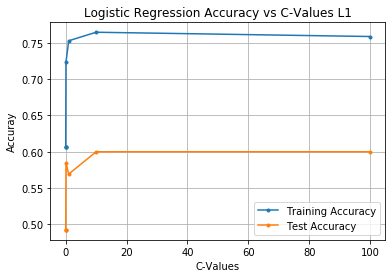

In [18]:
plt.plot(c_logreg_lasso, acc_train_logreg_lasso, '.-')
plt.plot(c_logreg_lasso, acc_test_logreg_lasso, '.-')
plt.xlabel('C-Values')
plt.ylabel('Accuray')
plt.title("Logistic Regression Accuracy vs C-Values L1")
plt.grid()

plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')

In [19]:
acc_train_logreg_ridge = []
acc_test_logreg_ridge = []
c_logreg_ridge = []

for c in cVals:
    logreg_model_ridge(c, x_train, y_train, x_test, y_test)

Accuracy on training data = 0.605882
Accuracy on test data = 0.492308
Accuracy on training data = 0.605882
Accuracy on test data = 0.492308
Accuracy on training data = 0.658824
Accuracy on test data = 0.553846
Accuracy on training data = 0.741176
Accuracy on test data = 0.584615
Accuracy on training data = 0.758824
Accuracy on test data = 0.569231
Accuracy on training data = 0.758824
Accuracy on test data = 0.600000
Accuracy on training data = 0.758824
Accuracy on test data = 0.600000


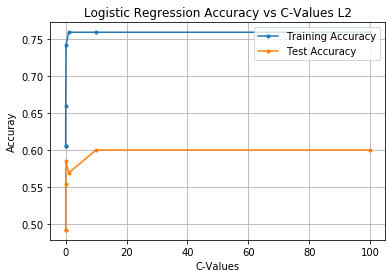

In [20]:
plt.plot(c_logreg_ridge, acc_train_logreg_ridge, '.-')
plt.plot(c_logreg_ridge, acc_test_logreg_ridge, '.-')
plt.xlabel('C-Values')
plt.ylabel('Accuray')
plt.title("Logistic Regression Accuracy vs C-Values L2")
plt.grid()

# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

In [21]:
acc_train_svm_linear = []
acc_test_svm_linear = []
c_svm_linear = []

for c in cVals:
    svm_linear(c, x_train, y_train, x_test, y_test)

Train Accuracy = 0.605882
Test Accuracy = 0.492308
Train Accuracy = 0.605882
Test Accuracy = 0.492308
Train Accuracy = 0.647059
Test Accuracy = 0.553846
Train Accuracy = 0.752941
Test Accuracy = 0.584615
Train Accuracy = 0.764706
Test Accuracy = 0.600000
Train Accuracy = 0.770588
Test Accuracy = 0.584615
Train Accuracy = 0.770588
Test Accuracy = 0.584615


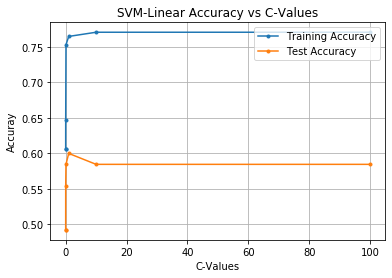

In [22]:
plt.plot(c_svm_linear, acc_train_svm_linear, '.-')
plt.plot(c_svm_linear, acc_test_svm_linear, '.-')
plt.xlabel('C-Values')
plt.ylabel('Accuray')
plt.title("SVM-Linear Accuracy vs C-Values")
plt.grid()

plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

In [23]:
acc_train_svm_rbf = []
acc_test_svm_rbf = []
c_svm_rbf = []

for c in cVals:
    svm_rbf(c, x_train, y_train, x_test, y_test)

Train Accuracy = 0.605882
Test Accuracy = 0.492308
Train Accuracy = 0.605882
Test Accuracy = 0.492308
Train Accuracy = 0.605882
Test Accuracy = 0.492308
Train Accuracy = 0.658824
Test Accuracy = 0.553846
Train Accuracy = 0.794118
Test Accuracy = 0.646154
Train Accuracy = 0.823529
Test Accuracy = 0.569231
Train Accuracy = 0.864706
Test Accuracy = 0.569231


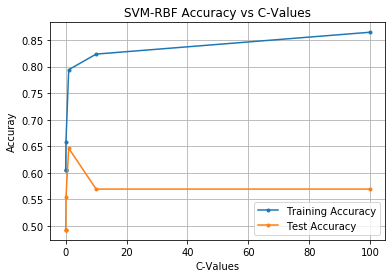

In [24]:
plt.plot(c_svm_rbf, acc_train_svm_rbf, '.-')
plt.plot(c_svm_rbf, acc_test_svm_rbf, '.-')
plt.xlabel('C-Values')
plt.ylabel('Accuray')
plt.title("SVM-RBF Accuracy vs C-Values")
plt.grid()

plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')

In [25]:
acc_train_svm_poly = []
acc_test_svm_poly = []
c_svm_poly = []

for c in cVals:
    svm_polynomial(c, x_train, y_train, x_test, y_test)

Train Accuracy = 0.605882
Test Accuracy = 0.492308
Train Accuracy = 0.605882
Test Accuracy = 0.492308
Train Accuracy = 0.605882
Test Accuracy = 0.492308
Train Accuracy = 0.617647
Test Accuracy = 0.507692
Train Accuracy = 0.758824
Test Accuracy = 0.584615
Train Accuracy = 0.805882
Test Accuracy = 0.553846
Train Accuracy = 0.817647
Test Accuracy = 0.569231


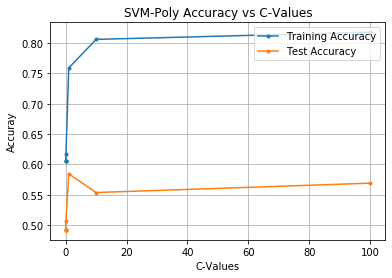

In [26]:
plt.plot(c_svm_poly, acc_train_svm_poly, '.-')
plt.plot(c_svm_poly, acc_test_svm_poly, '.-')
plt.xlabel('C-Values')
plt.ylabel('Accuray')
plt.title("SVM-Poly Accuracy vs C-Values")
plt.grid()

# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

In [27]:
# Neural Networks

In [28]:
#The activation function and its derivative
# def f(z):
#     return 1 / (1 + np.exp(-z))

def f(z):
    return(np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))
    
# def f(z):
#     for i in range(len(z)):
#         z[i] = max(0,z[i])
#     return z

# def f4(z):
#     for elem in z:
#         elem = max(0.3*elem,elem)
#     return z
    
# def f_deriv(z):
#     return f(z) * (1 - f(z))

def f_deriv(z):
    return 1 - (f(z)**2)
    
# def f_deriv(z):
#     for i in range(len(z)):    
#        if z[i] < 0:
#            z[i] = 0
#        else:
#            z[i] = 1
#     return z

# def f4_deriv(z):
#     for elem in z:    
#        if elem < 0:
#            elem = 0.3
#        else:
#            elem = 1
#     return z

In [29]:
def setup_and_init_weights(nn_structure):
    W = {} #creating a dictionary i.e. a set of key: value pairs
    b = {}
    for l in range(1, len(nn_structure)):
        W[l] = r.random_sample((nn_structure[l], nn_structure[l-1])) #Return “continuous uniform” random floats in the half-open interval [0.0, 1.0). 
        b[l] = r.random_sample((nn_structure[l],))
    return W, b

In [30]:
def init_tri_values(nn_structure):
    tri_W = {}
    tri_b = {}
    for l in range(1, len(nn_structure)):
        tri_W[l] = np.zeros((nn_structure[l], nn_structure[l-1]))
        tri_b[l] = np.zeros((nn_structure[l],))
    return tri_W, tri_b

In [31]:
def feed_forward(x, W, b):
    a = {1: x} # create a dictionary for holding the a values for all levels
    z = { } # create a dictionary for holding the z values for all the layers
    for l in range(1, len(W) + 1): # for each layer
        node_in = a[l]
        z[l+1] = W[l].dot(node_in) + b[l]  # z^(l+1) = W^(l)*a^(l) + b^(l)
        a[l+1] = f(z[l+1]) # a^(l+1) = f(z^(l+1))
    return a, z

In [32]:
def calculate_out_layer_delta(y, a_out, z_out):
    # delta^(nl) = -(y_i - a_i^(nl)) * f'(z_i^(nl))
    return -(y-a_out) * f_deriv(z_out) 


def calculate_hidden_delta(delta_plus_1, w_l, z_l):
    # delta^(l) = (transpose(W^(l)) * delta^(l+1)) * f'(z^(l))
    return np.dot(np.transpose(w_l), delta_plus_1) * f_deriv(z_l)

In [33]:
def train_nn(nn_structure, X, y, iter_num=3000, alpha=0.25):
    W, b = setup_and_init_weights(nn_structure)
    cnt = 0
    N = len(y)
    avg_cost_func = []
    print('Starting gradient descent for {} iterations'.format(iter_num))
    while cnt < iter_num:
        if cnt%1000 == 0:
            print('Iteration {} of {}'.format(cnt, iter_num))
        tri_W, tri_b = init_tri_values(nn_structure)
        avg_cost = 0
        for i in range(N):
            delta = {}
            # perform the feed forward pass and return the stored a and z values, to be used in the
            # gradient descent step
            a, z = feed_forward(X[i, :], W, b)
            # loop from nl-1 to 1 backpropagating the errors
            for l in range(len(nn_structure), 0, -1):
                if l == len(nn_structure):
                    delta[l] = calculate_out_layer_delta(y[i,:], a[l], z[l])
                    avg_cost += np.linalg.norm((y[i,:]-a[l]))
                else:
                    if l > 1:
                        delta[l] = calculate_hidden_delta(delta[l+1], W[l], z[l])
                    # triW^(l) = triW^(l) + delta^(l+1) * transpose(a^(l))
                    tri_W[l] += np.dot(delta[l+1][:,np.newaxis], np.transpose(a[l][:,np.newaxis]))# np.newaxis increase the number of dimensions
                    # trib^(l) = trib^(l) + delta^(l+1)
                    tri_b[l] += delta[l+1]
        # perform the gradient descent step for the weights in each layer
        for l in range(len(nn_structure) - 1, 0, -1):
            #W[l] += -alpha * (1.0/N * tri_W[l])
            W[l] += -alpha * ((1.0/N * tri_W[l]) + ((.001/2)*(W[l]))) #with regularization term
            b[l] += -alpha * (1.0/N * tri_b[l])
        # complete the average cost calculation
        avg_cost = 1.0/N * avg_cost
        avg_cost_func.append(avg_cost)
        cnt += 1
    return W, b, avg_cost_func


def predict_y(W, b, X, n_layers):
    N = X.shape[0]
    y = np.zeros((N,))
    for i in range(N):
        a, z = feed_forward(X[i, :], W, b)
        y[i] = np.argmax(a[n_layers])
    return y

In [34]:
x = np.array(df2[['M/F', 'Age', 'eTIV', 'nWBV', 'ASF']])
y = np.array(df2['CDR'])

for entry in x:
    if entry[0] == 'F':
        entry[0] = 0
    else:
        entry[0] = 1
        
X_scale = preprocessing.StandardScaler()
x = X_scale.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.275)

y_vect = np.zeros((len(y_train), 5))
for i in range(len(y_train)):
    y_vect[i, int(y_train[i]*2)] = 1
y_train = y_vect

y_test2 = np.zeros((len(y_test),))
for i in range(len(y_test)):
    y_test2[i] = y_test[i]*2
y_test = y_test2

nn_structure = [5, 10, 10, 5]

# train the NN
W, b, avg_cost_func = train_nn(nn_structure, x_train, y_train, 4000)

Starting gradient descent for 4000 iterations
Iteration 0 of 4000
Iteration 1000 of 4000
Iteration 2000 of 4000
Iteration 3000 of 4000


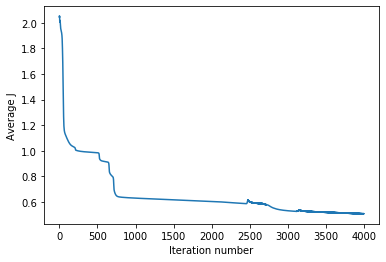

In [35]:
# plot the avg_cost_func
plt.plot(avg_cost_func)
plt.ylabel('Average J')
plt.xlabel('Iteration number')
plt.show()

In [37]:
# get the prediction accuracy and print
y_pred = predict_y(W, b, x_test, 4)
print(y_test)
print(y_pred)

print('Prediction accuracy is {}%'.format(accuracy_score(y_test, y_pred) * 100))

[2. 0. 0. 1. 0. 1. 2. 1. 1. 0. 0. 1. 2. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 2. 0. 2. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 2. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 4. 1. 1. 0. 0. 0. 1.]
[1. 1. 0. 2. 0. 1. 0. 1. 0. 1. 1. 2. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0.
 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 2. 1. 0. 0. 0. 1. 1. 1. 1. 2. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 2. 1. 0. 1. 0. 1. 0. 1.]
Prediction accuracy is 58.46153846153847%


In [38]:
# Unsupervised Learning

In [41]:
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=2, random_state=0).fit(x)
# kmeans.labels_
# array([1, 1, 1, 0, 0, 0], dtype=int32)
# kmeans.predict([[0, 0], [12, 3]])
# array([1, 0], dtype=int32)
kmeans.cluster_centers_
score = accuracy_score(y_test,kmeans.predict(x_test))
print('Accuracy:{0:f}'.format(score))

Accuracy:0.276923


In [42]:
df1= df[['M/F', 'Age', 'eTIV', 'nWBV', 'ASF', 'CDR']]
df2= df1.dropna()

x = np.array(df2[['M/F', 'Age', 'eTIV', 'nWBV', 'ASF']])
y = np.array(df2['CDR'])

y = y.reshape(-1,1)

for entry in x:
    if entry[0] == 'F':
        entry[0] = 0
    else:
        entry[0] = 1

for entry in y:
    if entry[0] != 0:
        entry[0] = 1
        
lab_enc = preprocessing.LabelEncoder()
y = lab_enc.fit_transform(y)

x = preprocessing.scale(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.275)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[ 0.44711953  0.15408128  0.59221435 -0.27850459 -0.58996648]
 [ 0.19625851 -0.70454301  0.16766767  0.63916591 -0.16868977]]
[0.50365773 0.32848104]


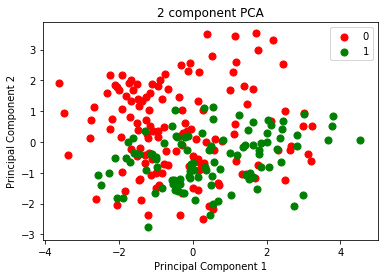

In [43]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
target = pd.DataFrame(y, columns = ['CDR'])
finalDf = pd.concat([principalDf, target], axis = 1)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("2 component PCA")
plt.grid()

targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['CDR'] == target
    plt.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
plt.legend(targets)
plt.grid()
print(pca.components_)
print(pca.explained_variance_ratio_)

In [44]:
df1= df[['M/F', 'Age', 'eTIV', 'nWBV', 'ASF', 'CDR']]
df2= df1.dropna()

x = np.array(df2[['M/F', 'Age', 'eTIV', 'nWBV', 'ASF']])
y = np.array(df2['CDR'])

y = y.reshape(-1,1)

for entry in x:
    if entry[0] == 'F':
        entry[0] = 0
    else:
        entry[0] = 1

for entry in y:
    if entry[0] != 0:
        entry[0] = 1
        
lab_enc = preprocessing.LabelEncoder()
y = lab_enc.fit_transform(y)

x = preprocessing.scale(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.275)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [46]:
pca = decomposition.PCA(.85)
x_train = pca.fit_transform(x_train)
x_test = pca.fit_transform(x_test)

logisticRegr = LogisticRegression(solver = 'lbfgs')

logisticRegr.fit(x_train, y_train)

train_pred = logisticRegr.predict(x_train)
print(logisticRegr.score(x_train, y_train))

test_pred = logisticRegr.predict(x_test)
print(logisticRegr.score(x_test, y_test))



# print(x_train_pca.shape)
# print(x_train_pca)
# print(x_test_pca)

# pca_init = PCA().fit_train(x_train)
# plt.plot(np.cumsum(pca_init.explained_variance_ratio_))
# plt.grid()

# pca = PCA(n_components=2)
# pca.fit(X)


0.6941176470588235
0.6923076923076923
